# This notebook performs the Neural Network optimized technique. 


## Libraries
`import pandas as pd`- Access the Pandas Library. It takes data from files such as CSV or TSV and creates a Python object with rows and columns other known as a DataFrame.

`import numpy as np` - NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers

`import matplotlib.pyplot as plt` - Matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure, e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels.

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

## Reading Files
`pd.read_csv()` reads a comma-separated values(csv) file into DataFrame.

In [3]:
training_data = pd.read_csv("train_data.csv")
crossval_data = pd.read_csv("cv_data.csv")

## Removing values
In the cell below we use the pop function to remove the columns such as `Unnamed` and `User` from the the `training data ` and our `cross validation ` data. We remove these columns because they are not important to the testing of our models.

In [4]:
training_data.pop('Unnamed: 0')
training_data.pop('User')
training_data.head(3)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,Class
0,0.094568,-0.292415,-0.829242,0.808311,-0.999832,-1.061223,-0.428011,-0.005781,-0.479768,1.029530,-0.290812,-1.032775,0.222251,-1.573760,-0.951098,1
1,0.164180,-0.273078,-0.747491,-0.365735,-0.031963,-0.398817,0.866498,-0.920805,-0.963154,1.096778,-0.275489,-0.950012,0.294329,-1.548137,-0.883220,1
2,0.143341,-0.268184,-0.765351,-0.401403,-0.029721,-0.427667,0.843033,-0.913344,-0.982305,1.078122,-0.263563,-0.962075,0.297303,-1.547822,-0.884921,1


In [5]:
crossval_data.pop('Unnamed: 0')
crossval_data.pop('User')
crossval_data.head(3)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,Class
0,-0.011697,-1.180810,-2.183332,-1.556744,-1.125719,-1.848526,-0.829392,-0.905204,-1.866450,-1.782878,-0.835387,-1.161360,-1.843616,-1.779319,-1.238216,1
1,0.104689,-1.109310,-2.081804,-0.800283,-0.935223,-1.959605,-1.309219,-0.937808,-1.625959,-1.696088,-0.755318,-1.118794,0.065550,-1.865397,-1.712987,1
2,-1.752188,-1.097561,-1.479767,0.405706,-1.029926,-1.567298,-0.983402,-0.980608,-1.576618,-0.295130,-0.795591,-1.540360,-1.712344,-1.597558,-1.312438,1


## Declaring variables
Below we take the data from training_data and crossval_data and split it up into corresponding variables. In the training data, we take all the columns except the last column - `Label` and store it into the variable `X_train` and only taking the last column - `Label` and storing it into the variable `y_train`. We do the exact same with the cross validation data, storing all the columns except the last into the variable `X_test` and the last column into the variable `y_test`. 

In [6]:
X_train = training_data.drop('Class', axis=1)
y_train = training_data['Class']

X_crossval = crossval_data.drop('Class', axis=1)
y_crossval = crossval_data['Class']

## Libraries

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sklm

In [20]:
warnings.simplefilter('ignore')

C:\Users\MTashreeqW\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


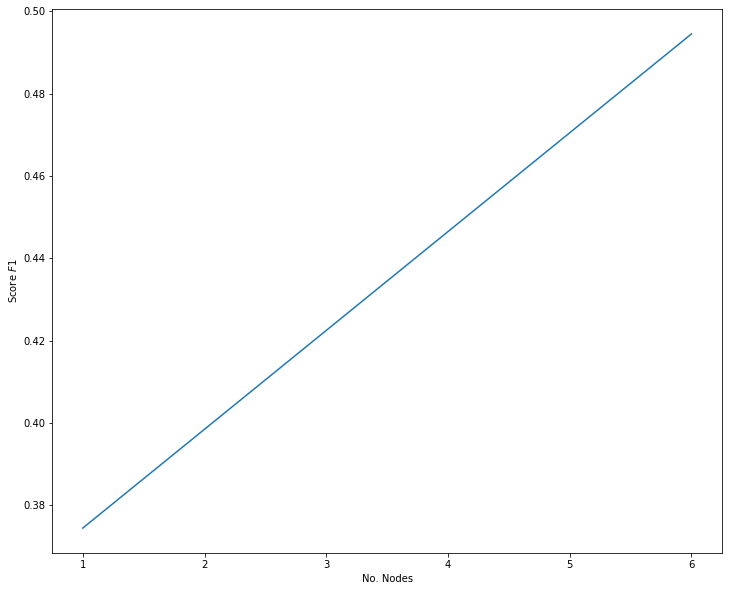

In [13]:
def nodesVSf1(X, y, X_crossval,y_crossval):    
    
    nodes = []
    for i in range(1,25,5):
        nodes.append(i)
    
    f1 = []
    for n in nodes:  # looping through node array 
        
        clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n), random_state=1) # creating nn with n nodes
        clf.fit(X, y.squeeze())
        yPred = clf.predict(X_crossval)        
        f1.append(f1_score(y_crossval, yPred, average='macro'))
        
    plt.figure(figsize=(12,10))
    plt.plot(nodes, f1) # plotting the f1 score of each nn created to see when the f1 score maximizes

    plt.xlabel('No. Nodes')
    plt.ylabel('Score $ F1$')
    
nodesVSf1(X_train, y_train, X_crossval, y_crossval)

In [22]:
NeuralNetworkMPLFinal = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(45), random_state=1)
NeuralNetworkMPLFinal.fit(X_train, y_train.squeeze())

,No. of Nodes in Hidden Layer,CV Accuracy(%)
0,10.0,65.538745
1,20.0,67.654876


In [ ]:
print(NeuralNetworkMPLFinal.score(X_train, y_train))

In [ ]:
y_pred = NeuralNetworkMPLFinal.predict(X_crossval)

print(metrics.accuracy_score(y_crossval, y_pred))

In [ ]:
yPred = NeuralNetworkMPLFinal.predict(X_crossval)

print(classification_report(y_crossval,yPred))

Dumping the model into a pickle file

In [ ]:
file =  "NeuralNetworkModel.sav"
pickle.dump(NeuralNetworkMPLFinal,open(file,'wb'))